In [1]:
import tensorflow as tf

In [4]:
filenames = ["train.tfrecords"] #TODO: change to correct path

raw_dataset = tf.data.TFRecordDataset(filenames)
raw_dataset

<TFRecordDatasetV2 shapes: (), types: tf.string>

In [ ]:
for raw_record in raw_dataset.take(1):
  example = tf.train.Example()
  example.ParseFromString(raw_record.numpy())
  print(example)

In [6]:
# Create a dictionary describing the features.
image_feature_description = {
    'x': tf.io.FixedLenFeature([], tf.string),
    'y': tf.io.FixedLenFeature([], tf.int64),
}

def _parse_image_function(example_proto):
  # Parse the input tf.train.Example proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, image_feature_description)

parsed_image_dataset = raw_dataset.map(_parse_image_function)
parsed_image_dataset

<MapDataset shapes: {x: (), y: ()}, types: {x: tf.string, y: tf.int64}>

In [14]:
import matplotlib.pyplot as plt

86


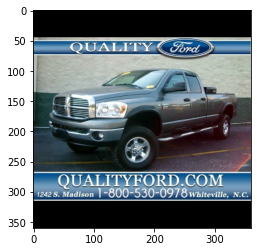

88


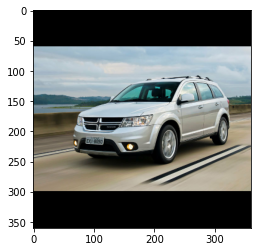

86


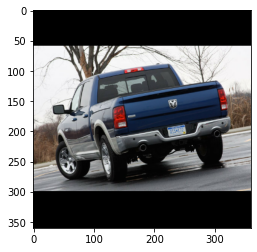

94


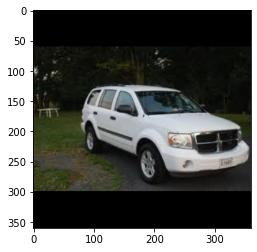

88


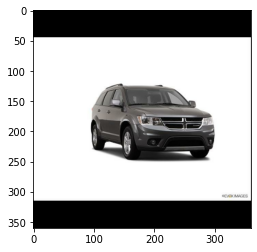

In [20]:
for image_features in parsed_image_dataset.take(5):
  image_raw = image_features['x'].numpy()
  label_raw = image_features['y'].numpy()
  parsed = tf.io.parse_tensor(image_raw, tf.float32)
  print(label_raw)
  plt.figure()
  plt.imshow(parsed.numpy() / 255)
  plt.show()

In [25]:
def _parse_image_function(example_proto):
   image_feature_description = {
    'x': tf.io.FixedLenFeature([], tf.string),
    'y': tf.io.FixedLenFeature([], tf.int64),
   }

   # Parse the input tf.train.Example proto using the dictionary above.
   example = tf.io.parse_single_example(example_proto, image_feature_description)
   
   parsed_image = tf.io.parse_tensor(example["x"], tf.float32)
   parsed_label = tf.cast(image_features['y'], tf.int32)

   return parsed_image, parsed_label



def get_dataset_items(filepath):
   raw_dataset = tf.data.TFRecordDataset(filenames)
   return raw_dataset.map(_parse_image_function)

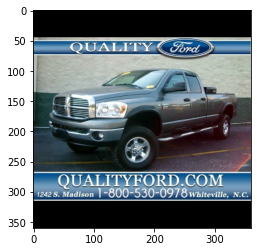

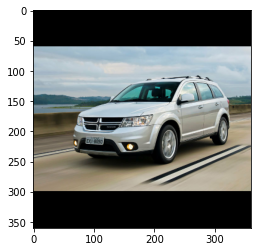

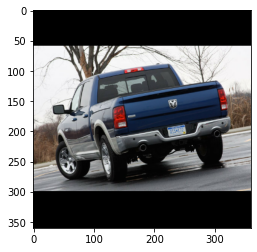

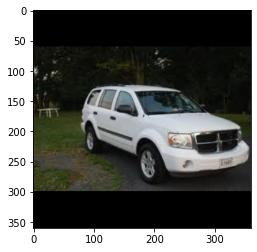

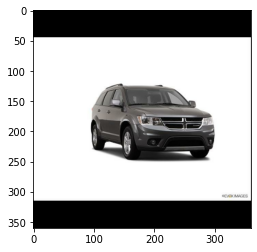

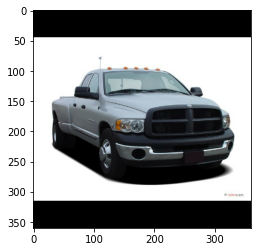

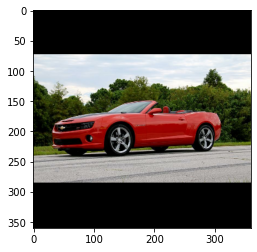

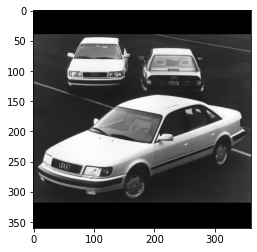

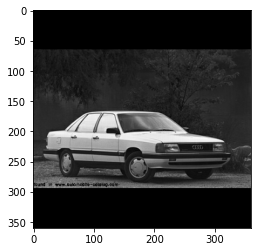

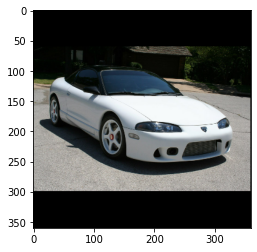

In [28]:
good_dataset = get_dataset_items("C:/Users/vijaye/tf-similarity-benchmarking/similarity/datasets/1.0.0/cars196/train.tfrecords")

for x, y in good_dataset.take(10):
    plt.imshow(x / 255)
    plt.show()

In [29]:
good_dataset

<MapDataset shapes: (<unknown>, ()), types: (tf.float32, tf.int32)>